In [55]:
import os
import glob
import pandas as pd

path_to_directory = 'data/shapes'


paths_to_images = glob.glob(os.path.join(path_to_directory, '**', '*.png'), recursive=True)

filepaths = paths_to_images
labels = [os.path.basename(os.path.dirname(path)) for path in filepaths]

df = pd.DataFrame({'filepath': filepaths, 'label': labels})

print(df)

                                filepath    label
0    data/shapes/circles/drawing(48).png  circles
1    data/shapes/circles/drawing(33).png  circles
2    data/shapes/circles/drawing(64).png  circles
3    data/shapes/circles/drawing(72).png  circles
4    data/shapes/circles/drawing(25).png  circles
..                                   ...      ...
295  data/shapes/squares/drawing(30).png  squares
296  data/shapes/squares/drawing(67).png  squares
297  data/shapes/squares/drawing(88).png  squares
298  data/shapes/squares/drawing(71).png  squares
299  data/shapes/squares/drawing(26).png  squares

[300 rows x 2 columns]


In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [57]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

for train_index, val_index in kf.split(df):
    train_df = df.iloc[train_index]
    val_df = df.iloc[val_index]

    train_iterator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='filepath',
        y_col='label',
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=1,
        class_mode='categorical',
        shuffle=True,
        seed=1234
    )

    val_iterator = train_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col='filepath',
        y_col='label',
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=1,
        class_mode='categorical',
        shuffle=False,
        seed=1234
    )

    # test_iterator = test_datagen.flow_from_dataframe(
    #     dataframe=val_df, 
    #     x_col='filepath',
    #     y_col='label',
    #     batch_size=1,
    #     class_mode='categorical',
    #     shuffle=False,
    #     seed=1234
    # )


Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    GlobalAveragePooling2D,
    Dense,
    Input,
    Dropout
)

def build_cnn_model(input_shape=(28, 28, 1), num_classes=3):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(16, (3, 3), activation='relu'),
        MaxPooling2D(),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(),
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_alternative_cnn_model(input_shape=(28, 28, 1), num_classes=3):
    model_alternative = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),  
        MaxPooling2D(),
        Dropout(0.5),

        Conv2D(64, (3, 3), activation='relu'),  
        MaxPooling2D(),
        Dropout(0.5),

        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),  
        Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ])
    return model_alternative


In [59]:
import matplotlib.pyplot as plt

def plot_per_fold(history, fold, model_name, batch_size, learning_rate, optimizer_name):
    """Plots accuracy and loss for a single fold."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Model: {model_name}, Fold {fold}, Batch Size: {batch_size}, LR: {learning_rate}, Optimizer: {optimizer_name}")

    axes[0].plot(history['accuracy'], label="Train Accuracy")
    axes[0].plot(history['val_accuracy'], label="Val Accuracy", linestyle='--')
    axes[0].set_title("Accuracy")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Accuracy")
    axes[0].legend()

    axes[1].plot(history['loss'], label="Train Loss")
    axes[1].plot(history['val_loss'], label="Val Loss", linestyle='--')
    axes[1].set_title("Loss")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Loss")
    axes[1].legend()

    plt.tight_layout()
    plt.show()


*** Current cross-validation iteration: 1/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3039 - loss: 1.1082 - val_accuracy: 0.3167 - val_loss: 1.1102
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2769 - loss: 1.1108 - val_accuracy: 0.3833 - val_loss: 1.1009
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4063 - loss: 1.0975 - val_accuracy: 0.4833 - val_loss: 1.0981
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3995 - loss: 1.0893 - val_accuracy: 0.3000 - val_loss: 1.0863
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4669 - loss: 0.9930 - val_accuracy: 0.7000 - val_loss: 0.7455
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6005 - loss: 0.7277 - val_accuracy: 0.6167 - val_loss: 0.5936
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6210 - loss: 0.6684 - val_accuracy: 0.6167 - val_loss: 0.5989
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6012 - loss: 0.5819 - val_accuracy: 0.7333 - val_

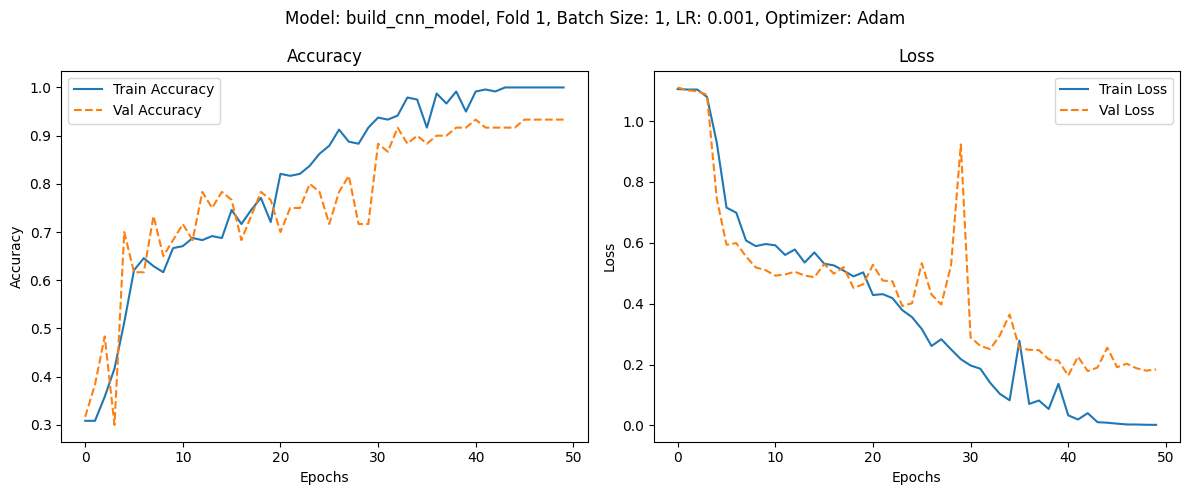

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

*** Current cross-validation iteration: 2/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3272 - loss: 1.1179 - val_accuracy: 0.3167 - val_loss: 1.0975
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3209 - loss: 1.1036 - val_accuracy: 0.4000 - val_loss: 1.0970
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3375 - loss: 1.1004 - val_accuracy: 0.3167 - val_loss: 1.0896
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4367 - loss: 1.0605 - val_accuracy: 0.6333 - val_loss: 0.7626
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6275 - loss: 0.7315 - val_accuracy: 0.6000 - val_loss: 0.6042
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6481 - loss: 0.5851 - val_accuracy: 0.6167 - val_loss: 0.5832
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6932 - loss: 0.5842 - val_accuracy: 0.6500 - val_loss: 0.5583
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7493 - loss: 0.5300 - val_accuracy: 0.6667 - val_

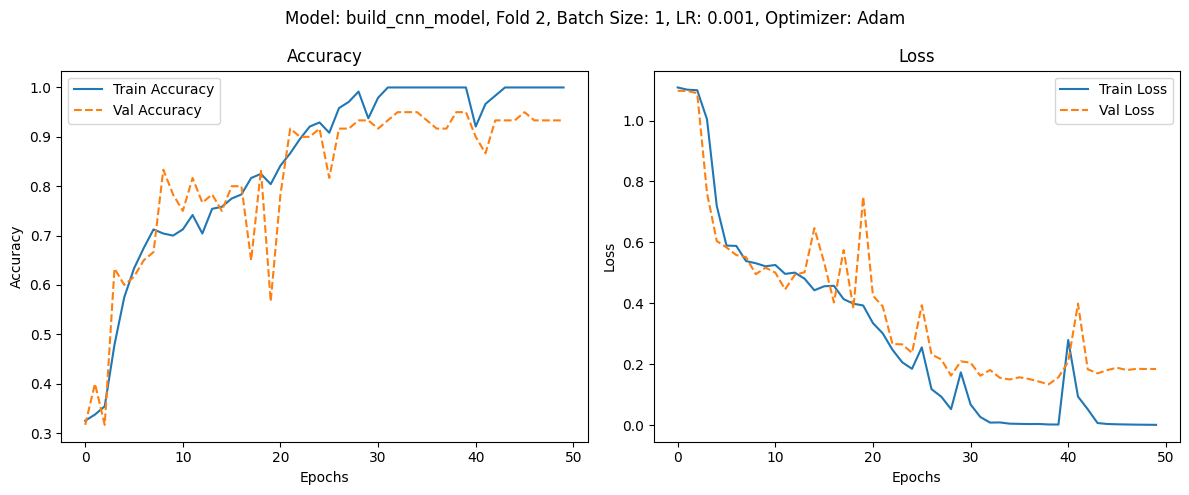

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

*** Current cross-validation iteration: 3/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3742 - loss: 1.1021 - val_accuracy: 0.4000 - val_loss: 1.0931
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3657 - loss: 1.0988 - val_accuracy: 0.2667 - val_loss: 1.1132
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4267 - loss: 1.0846 - val_accuracy: 0.5833 - val_loss: 0.9650
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5602 - loss: 0.9610 - val_accuracy: 0.6667 - val_loss: 0.7127
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6438 - loss: 0.6420 - val_accuracy: 0.6000 - val_loss: 0.7107
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6187 - loss: 0.5704 - val_accuracy: 0.6667 - val_loss: 0.6771
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7121 - loss: 0.5208 - val_accuracy: 0.6000 - val_loss: 0.9318
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5839 - loss: 0.5671 - val_accuracy: 0.6500 - val_

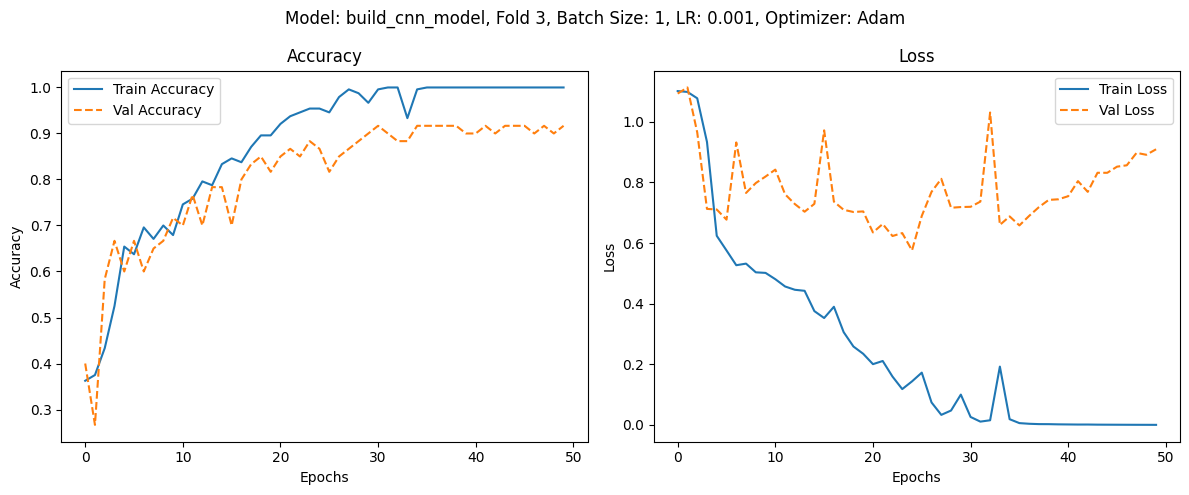

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

*** Current cross-validation iteration: 4/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3741 - loss: 1.1048 - val_accuracy: 0.3167 - val_loss: 1.1058
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3204 - loss: 1.1045 - val_accuracy: 0.2833 - val_loss: 1.1051
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2691 - loss: 1.0990 - val_accuracy: 0.2833 - val_loss: 1.1049
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4124 - loss: 1.0932 - val_accuracy: 0.2833 - val_loss: 1.1011
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3250 - loss: 1.0971 - val_accuracy: 0.2833 - val_loss: 1.1023
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3580 - loss: 1.1035 - val_accuracy: 0.3167 - val_loss: 1.1023
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3809 - loss: 1.0989 - val_accuracy: 0.3167 - val_loss: 1.1033
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2876 - loss: 1.0980 - val_accuracy: 0.2833 - val_

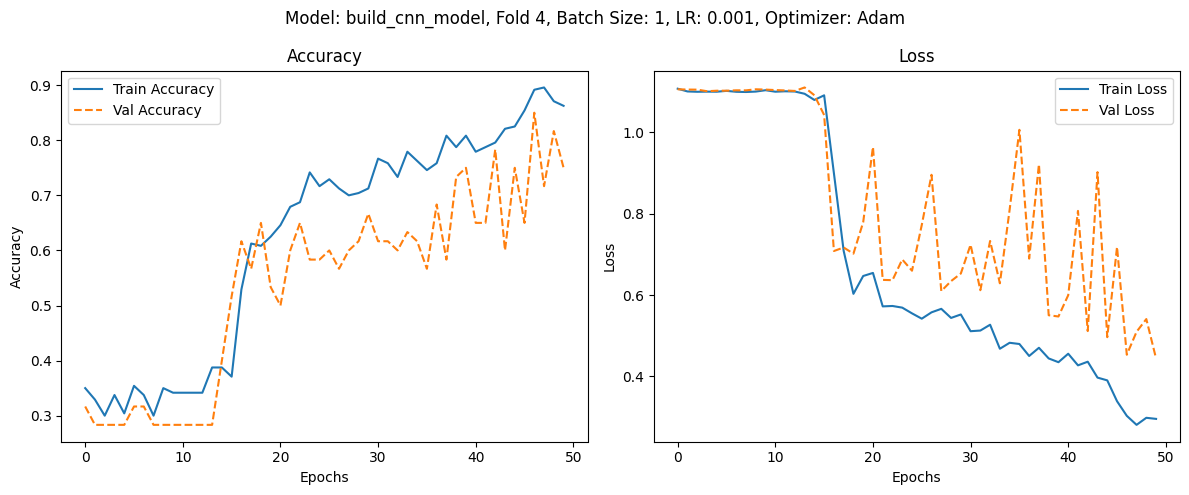

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

*** Current cross-validation iteration: 5/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3139 - loss: 1.1045 - val_accuracy: 0.3000 - val_loss: 1.0996
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3537 - loss: 1.1007 - val_accuracy: 0.5500 - val_loss: 1.0985
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3207 - loss: 1.1002 - val_accuracy: 0.3000 - val_loss: 1.0977
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3835 - loss: 1.1058 - val_accuracy: 0.3000 - val_loss: 1.0959
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4017 - loss: 1.0961 - val_accuracy: 0.3000 - val_loss: 1.1529
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5069 - loss: 1.0480 - val_accuracy: 0.5167 - val_loss: 0.8381
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5253 - loss: 0.8595 - val_accuracy: 0.7000 - val_loss: 0.5155
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6944 - loss: 0.6602 - val_accuracy: 0.6833 - val_

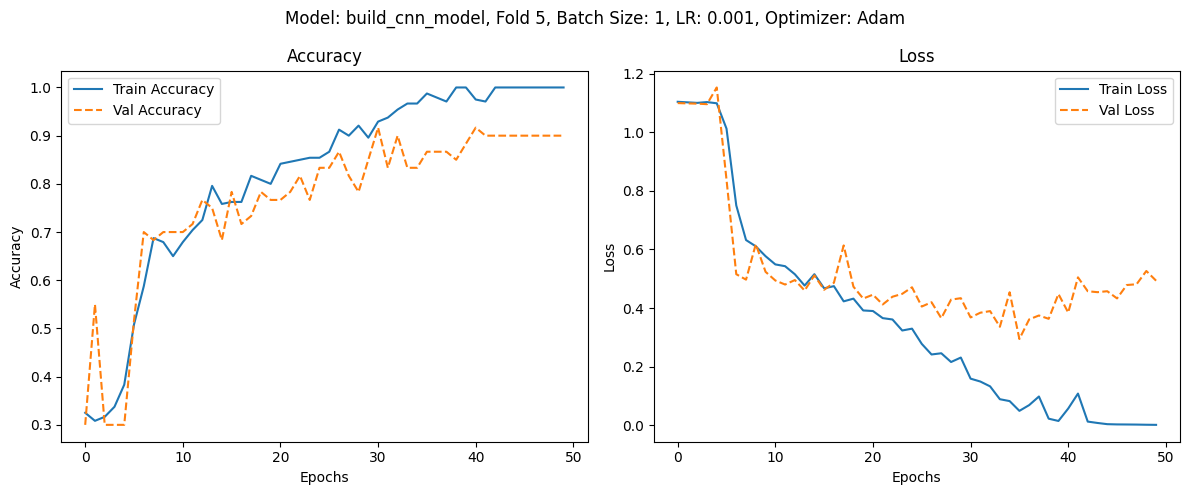

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

*** Current cross-validation iteration: 1/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2517 - loss: 1.1292 - val_accuracy: 0.3167 - val_loss: 1.1064
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3676 - loss: 1.0910 - val_accuracy: 0.3000 - val_loss: 1.1001
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3250 - loss: 1.1034 - val_accuracy: 0.4333 - val_loss: 1.1019
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3331 - loss: 1.1027 - val_accuracy: 0.3167 - val_loss: 1.0972
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4263 - loss: 1.0863 - val_accuracy: 0.3000 - val_loss: 1.0861
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3773 - loss: 1.0927 - val_accuracy: 0.3833 - val_loss: 1.0344
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4950 - loss: 1.0416 - val_accuracy: 0.7167 - val_loss: 0.8861
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5041 - loss: 0.9270 - val_accuracy: 0.6833 - val_

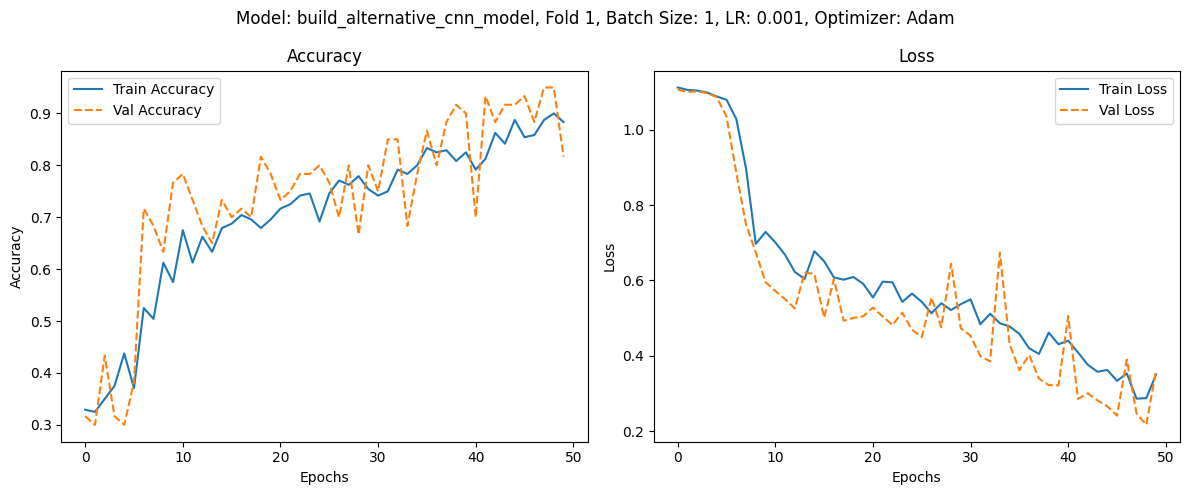

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

*** Current cross-validation iteration: 2/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3537 - loss: 1.1188 - val_accuracy: 0.3000 - val_loss: 1.0985
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3846 - loss: 1.0962 - val_accuracy: 0.3167 - val_loss: 1.1013
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3315 - loss: 1.0995 - val_accuracy: 0.3167 - val_loss: 1.0921
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3334 - loss: 1.0995 - val_accuracy: 0.3167 - val_loss: 1.0894
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3501 - loss: 1.0913 - val_accuracy: 0.3167 - val_loss: 1.0445
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4876 - loss: 1.0541 - val_accuracy: 0.5167 - val_loss: 0.9128
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5832 - loss: 0.9189 - val_accuracy: 0.6333 - val_loss: 0.7628
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6356 - loss: 0.7665 - val_accuracy: 0.6667 - val_

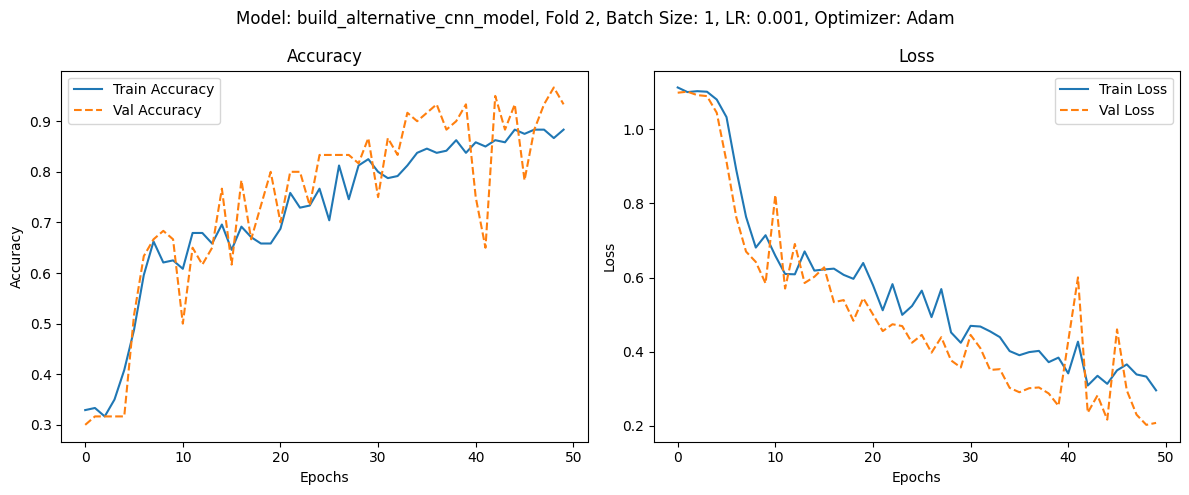

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

*** Current cross-validation iteration: 3/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3214 - loss: 1.1323 - val_accuracy: 0.2667 - val_loss: 1.1011
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3449 - loss: 1.1050 - val_accuracy: 0.2667 - val_loss: 1.1015
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3972 - loss: 1.0948 - val_accuracy: 0.3333 - val_loss: 1.0903
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3863 - loss: 1.0801 - val_accuracy: 0.5833 - val_loss: 1.0302
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5306 - loss: 1.0035 - val_accuracy: 0.5833 - val_loss: 0.8226
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6047 - loss: 0.7912 - val_accuracy: 0.6167 - val_loss: 0.7933
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5975 - loss: 0.7184 - val_accuracy: 0.6833 - val_loss: 0.6693
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7125 - loss: 0.6565 - val_accuracy: 0.6167 - val_

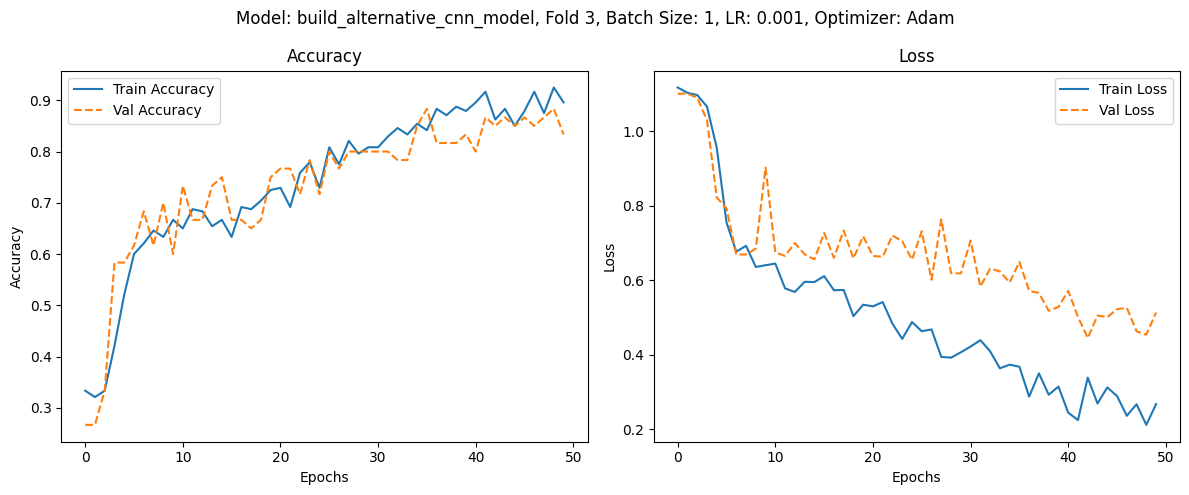

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

*** Current cross-validation iteration: 4/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2581 - loss: 1.1455 - val_accuracy: 0.3167 - val_loss: 1.0984
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3393 - loss: 1.1021 - val_accuracy: 0.3167 - val_loss: 1.0982
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3274 - loss: 1.0992 - val_accuracy: 0.3667 - val_loss: 1.0901
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4490 - loss: 1.0911 - val_accuracy: 0.5000 - val_loss: 1.0736
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4749 - loss: 1.0867 - val_accuracy: 0.5667 - val_loss: 0.9898
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5385 - loss: 0.9358 - val_accuracy: 0.6000 - val_loss: 0.8690
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6183 - loss: 0.7540 - val_accuracy: 0.6833 - val_loss: 0.7165
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5863 - loss: 0.6837 - val_accuracy: 0.7000 - val_

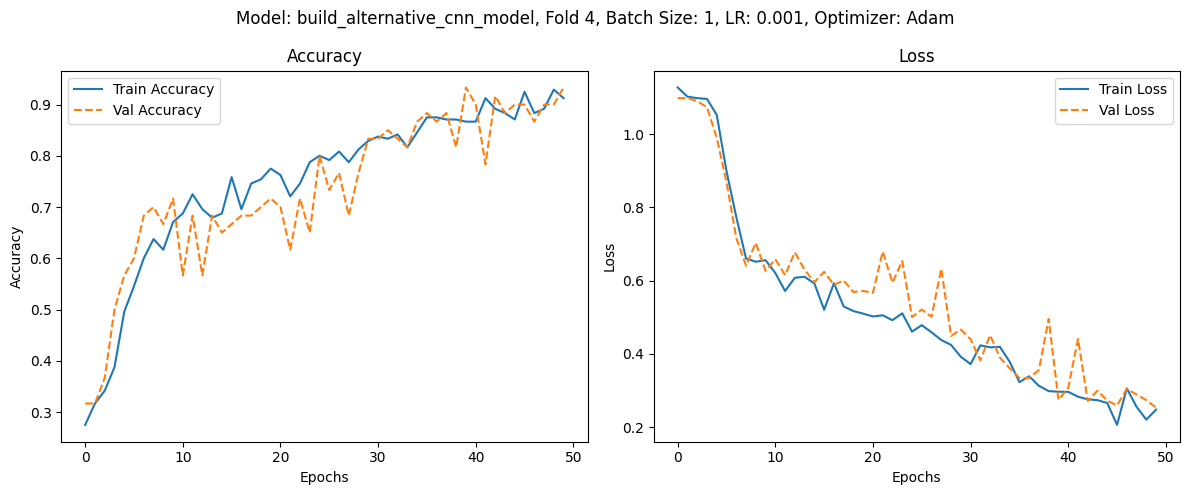

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

*** Current cross-validation iteration: 5/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3842 - loss: 1.1403 - val_accuracy: 0.3000 - val_loss: 1.1115
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4052 - loss: 1.0977 - val_accuracy: 0.3000 - val_loss: 1.0999
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2562 - loss: 1.1080 - val_accuracy: 0.3000 - val_loss: 1.0975
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4246 - loss: 1.0983 - val_accuracy: 0.3000 - val_loss: 1.0940
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3660 - loss: 1.0931 - val_accuracy: 0.7167 - val_loss: 1.0880
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4140 - loss: 1.0820 - val_accuracy: 0.5833 - val_loss: 1.0089
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5099 - loss: 1.0065 - val_accuracy: 0.6667 - val_loss: 0.8490
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5962 - loss: 0.8653 - val_accuracy: 0.5500 - val_

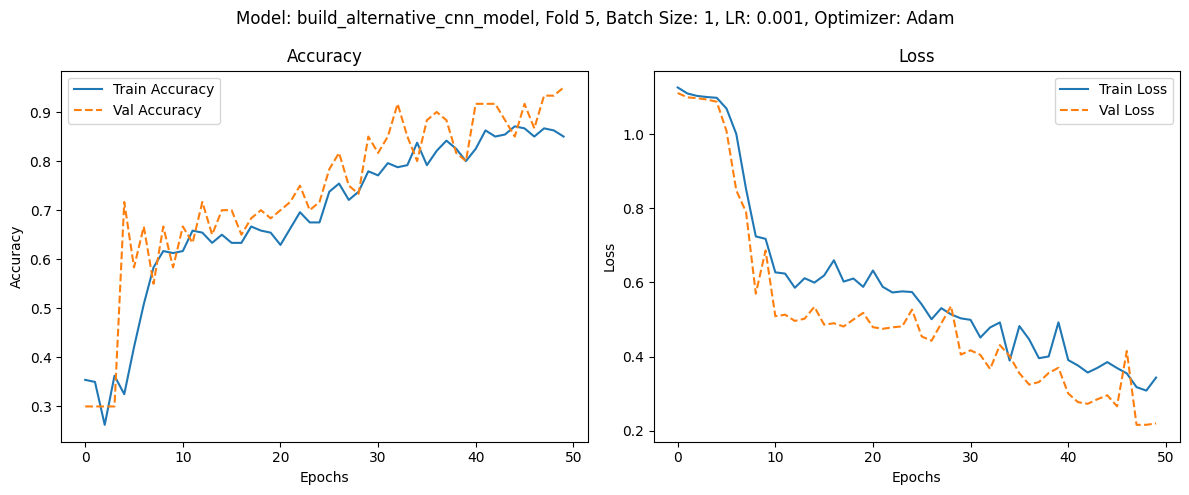

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

*** Current cross-validation iteration: 1/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3304 - loss: 1.1211 - val_accuracy: 0.3833 - val_loss: 1.0969
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3100 - loss: 1.1004 - val_accuracy: 0.3167 - val_loss: 1.1030
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3574 - loss: 1.1013 - val_accuracy: 0.3000 - val_loss: 1.1006
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3222 - loss: 1.1013 - val_accuracy: 0.3000 - val_loss: 1.1001
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3514 - loss: 1.0984 - val_accuracy: 0.3000 - val_loss: 1.0997
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3150 - loss: 1.0988 - val_accuracy: 0.3000 - val_loss: 1.0981
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4218 - loss: 1.0932 - val_accuracy: 0.3833 - val_loss: 1.0911
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3231 - loss: 1.0957 - val_accuracy: 0.3833 - val_loss: 1.0849
Epoch 9/50


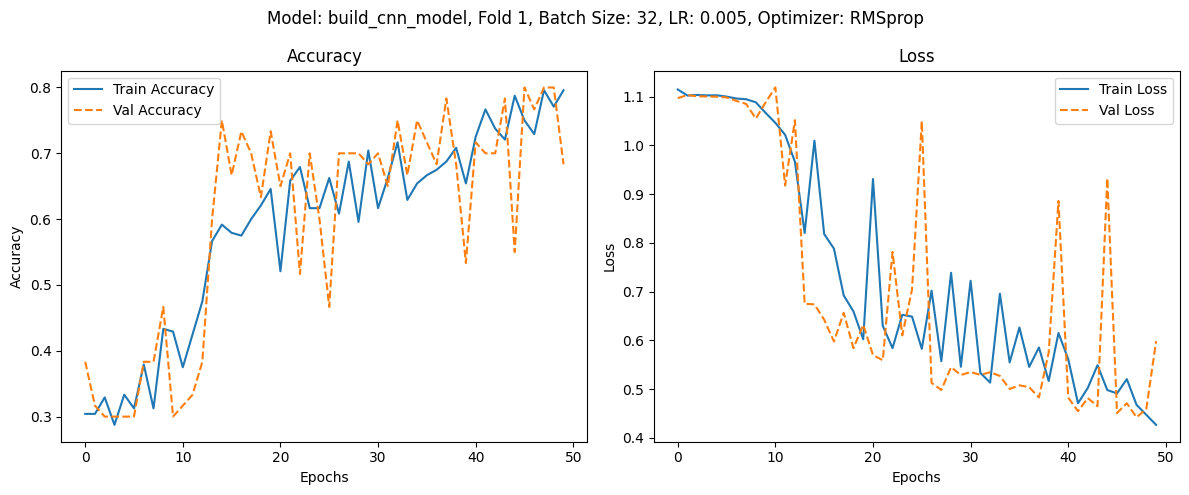

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

*** Current cross-validation iteration: 2/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.3838 - loss: 1.1499 - val_accuracy: 0.3000 - val_loss: 1.1119
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3537 - loss: 1.1009 - val_accuracy: 0.3833 - val_loss: 1.0945
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3174 - loss: 1.1009 - val_accuracy: 0.3000 - val_loss: 1.1031
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3305 - loss: 1.1031 - val_accuracy: 0.3000 - val_loss: 1.1012
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3647 - loss: 1.0987 - val_accuracy: 0.3000 - val_loss: 1.1002
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3412 - loss: 1.0993 - val_accuracy: 0.3000 - val_loss: 1.0997
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2865 - loss: 1.1015 - val_accuracy: 0.3167 - val_loss: 1.1000
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3169 - loss: 1.0994 - val_accuracy: 0.3167 - val_loss: 1.1001
Epoch 9/50


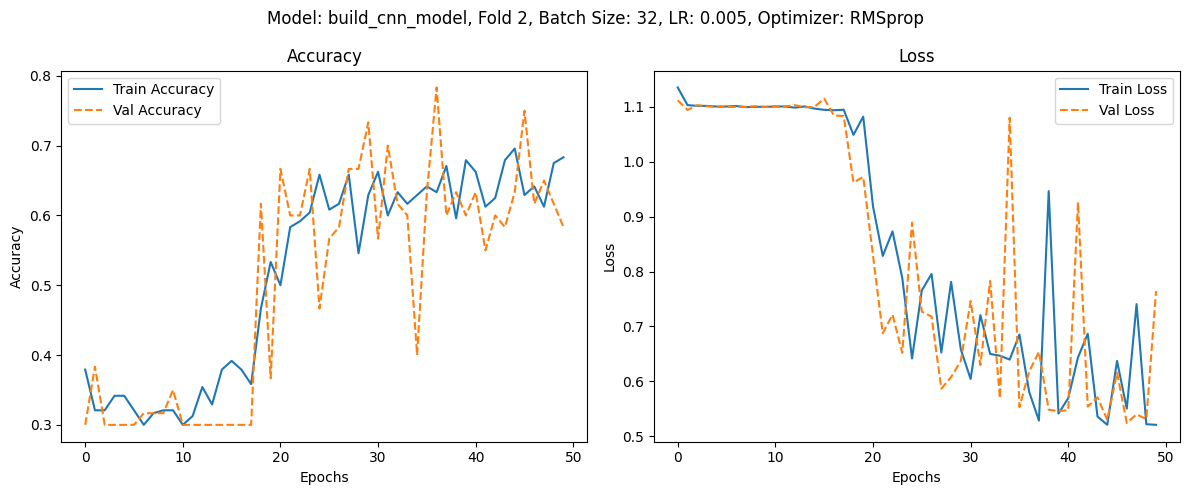

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

*** Current cross-validation iteration: 3/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3830 - loss: 1.1255 - val_accuracy: 0.4000 - val_loss: 1.0979
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3347 - loss: 1.1029 - val_accuracy: 0.2667 - val_loss: 1.1019
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3264 - loss: 1.0972 - val_accuracy: 0.5000 - val_loss: 1.0980
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4166 - loss: 1.0984 - val_accuracy: 0.2667 - val_loss: 1.1230
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3500 - loss: 1.1049 - val_accuracy: 0.3333 - val_loss: 1.0955
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3885 - loss: 1.0891 - val_accuracy: 0.4000 - val_loss: 1.0836
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4423 - loss: 1.0644 - val_accuracy: 0.4000 - val_loss: 1.0839
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4051 - loss: 1.0864 - val_accuracy: 0.6000 - val_loss: 0.9908
Epoch 9/50


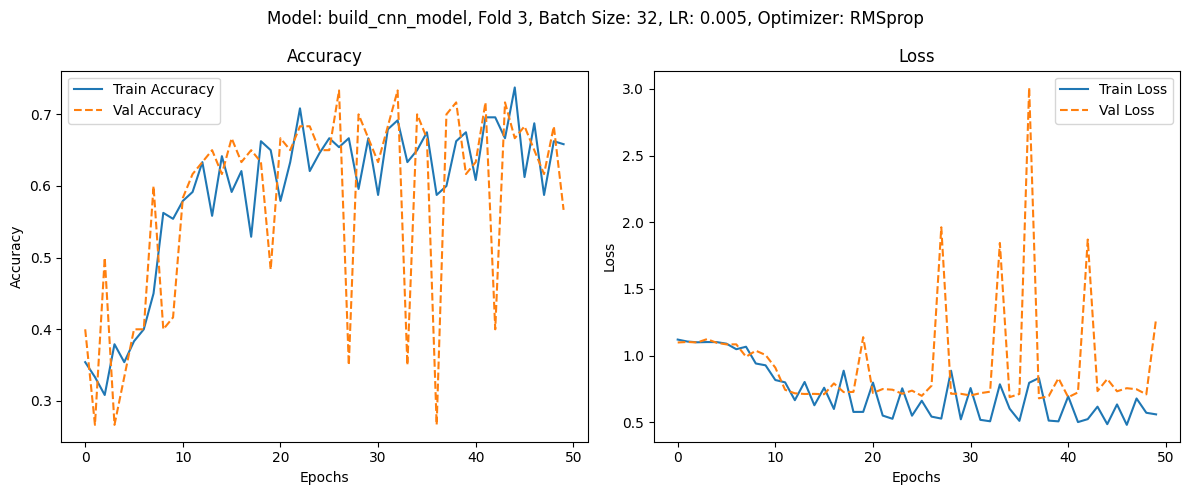

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step

*** Current cross-validation iteration: 4/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.2814 - loss: 1.1147 - val_accuracy: 0.3167 - val_loss: 1.1093
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3067 - loss: 1.1040 - val_accuracy: 0.3167 - val_loss: 1.1003
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3383 - loss: 1.0935 - val_accuracy: 0.2833 - val_loss: 1.1173
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3326 - loss: 1.1040 - val_accuracy: 0.2833 - val_loss: 1.1166
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3607 - loss: 1.0888 - val_accuracy: 0.4000 - val_loss: 1.0774
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3140 - loss: 1.1264 - val_accuracy: 0.4333 - val_loss: 1.0532
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3654 - loss: 1.0922 - val_accuracy: 0.4167 - val_loss: 1.0379
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4036 - loss: 1.0676 - val_accuracy: 0.5167 - val_loss: 1.0339
Epoch 9/50


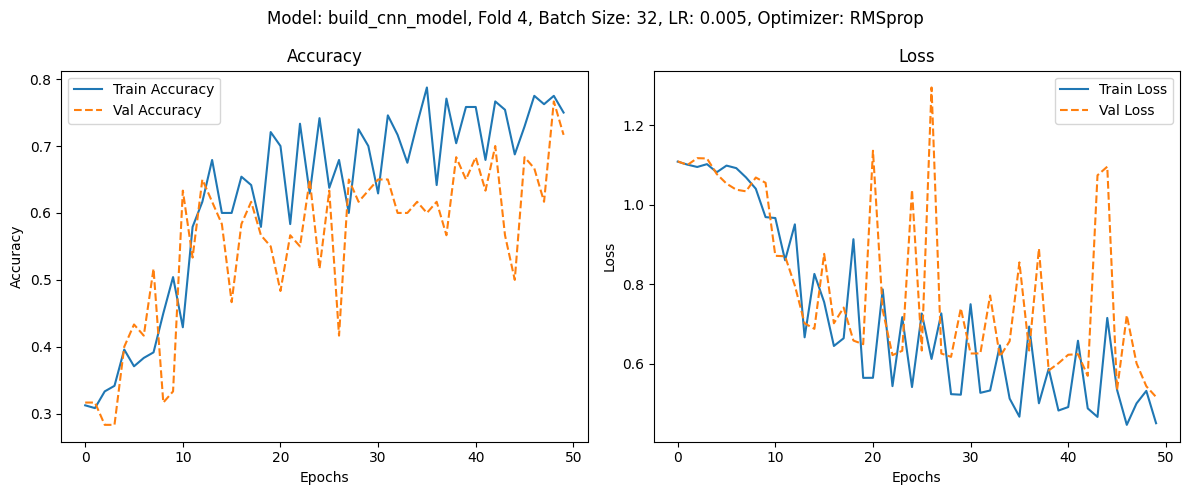

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step

*** Current cross-validation iteration: 5/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.3531 - loss: 1.1427 - val_accuracy: 0.3000 - val_loss: 1.1016
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2880 - loss: 1.1014 - val_accuracy: 0.3000 - val_loss: 1.1003
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3204 - loss: 1.0996 - val_accuracy: 0.3000 - val_loss: 1.1014
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3175 - loss: 1.1026 - val_accuracy: 0.3000 - val_loss: 1.1019
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3317 - loss: 1.0983 - val_accuracy: 0.3000 - val_loss: 1.1007
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3540 - loss: 1.0988 - val_accuracy: 0.3000 - val_loss: 1.1008
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2769 - loss: 1.1001 - val_accuracy: 0.3000 - val_loss: 1.1005
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3667 - loss: 1.0994 - val_accuracy: 0.3333 - val_loss: 1.1007
Epoch 9/50


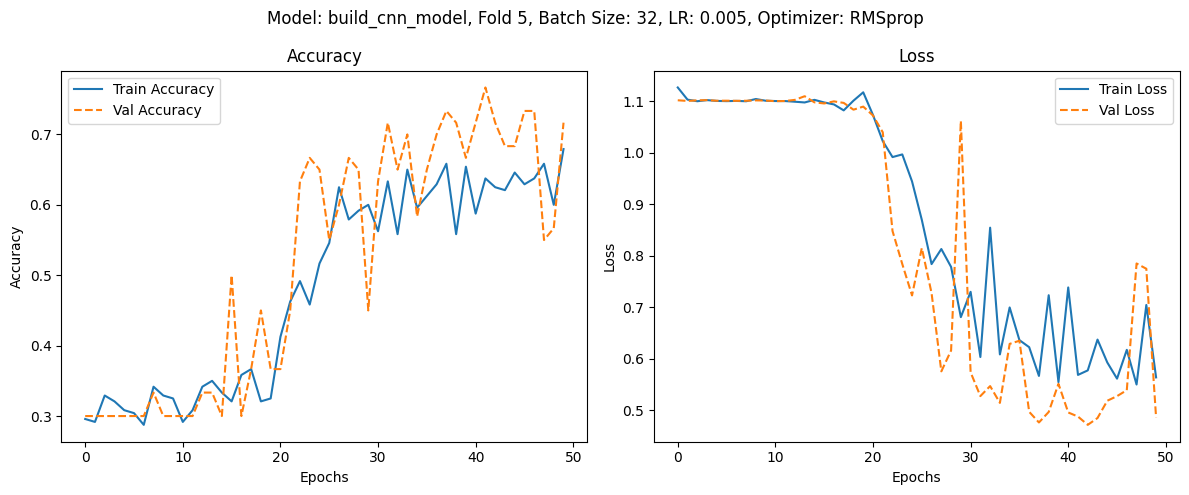

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

*** Current cross-validation iteration: 1/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2692 - loss: 1.3313 - val_accuracy: 0.3167 - val_loss: 1.1099
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2970 - loss: 1.1157 - val_accuracy: 0.3167 - val_loss: 1.1000
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2735 - loss: 1.1062 - val_accuracy: 0.3167 - val_loss: 1.1007
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3122 - loss: 1.1013 - val_accuracy: 0.3167 - val_loss: 1.1025
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3609 - loss: 1.1028 - val_accuracy: 0.3167 - val_loss: 1.1021
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3563 - loss: 1.0986 - val_accuracy: 0.3000 - val_loss: 1.1052
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3540 - loss: 1.1047 - val_accuracy: 0.3000 - val_loss: 1.1032
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3282 - loss: 1.0997 - val_accuracy: 0.3000 - val_loss: 1.1029
Epoch 9/50


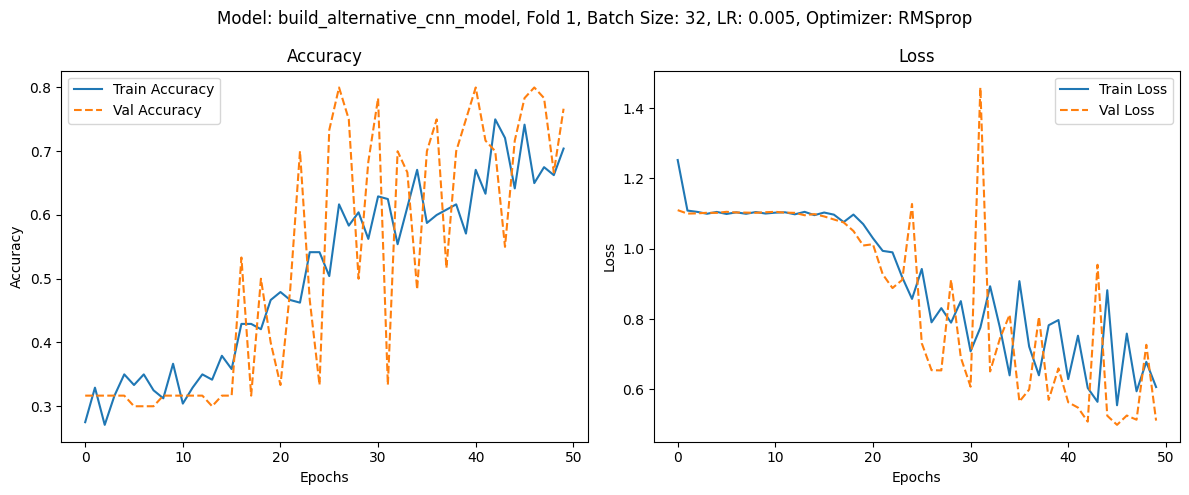

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

*** Current cross-validation iteration: 2/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.2896 - loss: 1.2283 - val_accuracy: 0.3833 - val_loss: 1.0955
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3578 - loss: 1.1049 - val_accuracy: 0.3000 - val_loss: 1.1074
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3568 - loss: 1.0989 - val_accuracy: 0.3833 - val_loss: 1.0965
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3211 - loss: 1.1051 - val_accuracy: 0.3167 - val_loss: 1.1007
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3325 - loss: 1.1013 - val_accuracy: 0.3167 - val_loss: 1.0993
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2904 - loss: 1.1038 - val_accuracy: 0.3000 - val_loss: 1.1010
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3286 - loss: 1.1040 - val_accuracy: 0.3000 - val_loss: 1.1027
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3288 - loss: 1.1010 - val_accuracy: 0.3000 - val_loss: 1.1048
Epoch 9/50


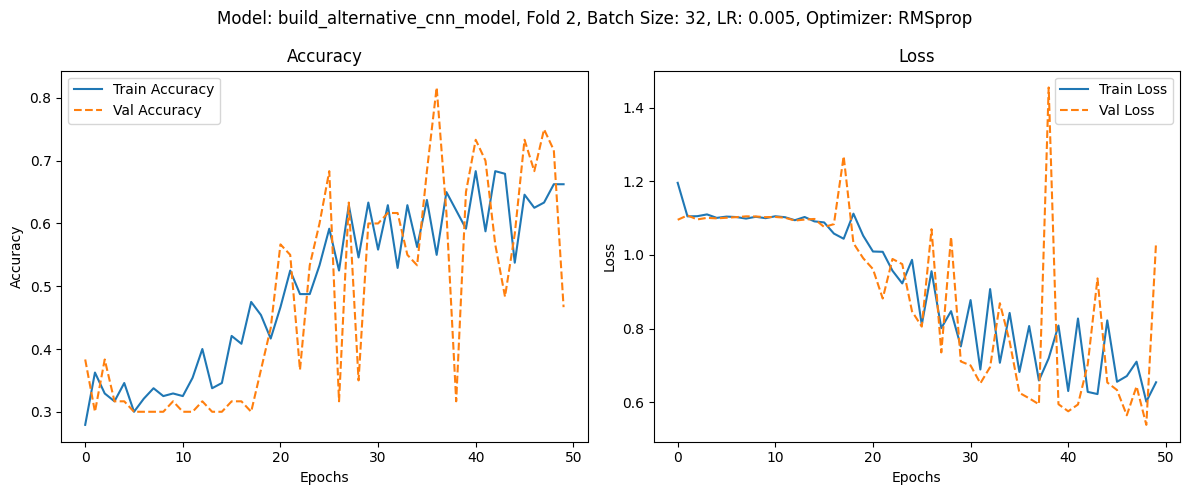

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

*** Current cross-validation iteration: 3/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.3939 - loss: 1.2132 - val_accuracy: 0.2667 - val_loss: 1.1140
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3308 - loss: 1.0976 - val_accuracy: 0.3333 - val_loss: 1.1004
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3284 - loss: 1.0975 - val_accuracy: 0.3333 - val_loss: 1.0968
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4020 - loss: 1.1000 - val_accuracy: 0.2667 - val_loss: 1.1144
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3122 - loss: 1.1077 - val_accuracy: 0.3333 - val_loss: 1.1014
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4029 - loss: 1.0978 - val_accuracy: 0.3333 - val_loss: 1.0996
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3785 - loss: 1.0979 - val_accuracy: 0.2667 - val_loss: 1.1027
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3273 - loss: 1.1013 - val_accuracy: 0.3333 - val_loss: 1.1030
Epoch 9/50


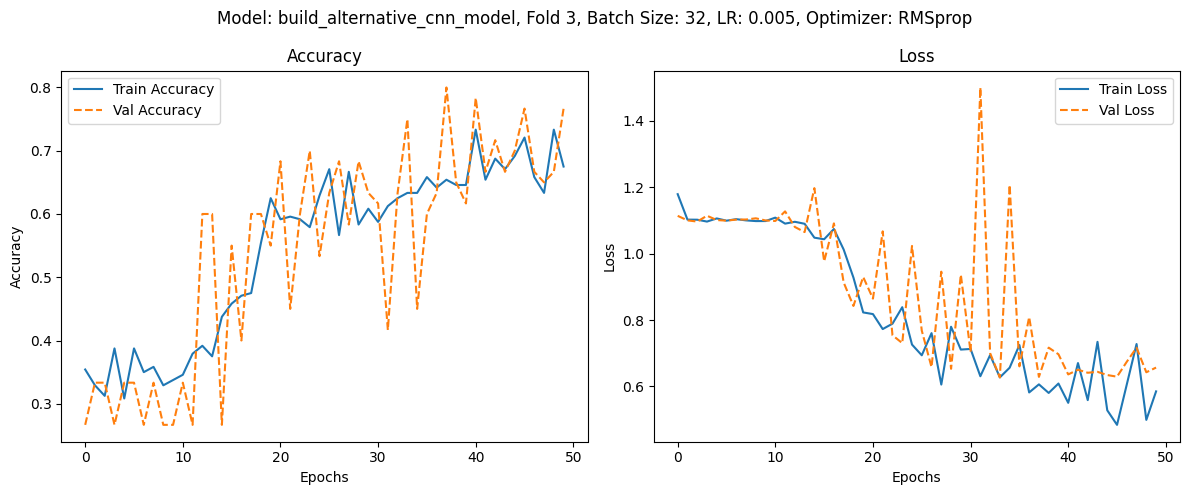

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step

*** Current cross-validation iteration: 4/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.3397 - loss: 1.2109 - val_accuracy: 0.4000 - val_loss: 1.0949
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3218 - loss: 1.1019 - val_accuracy: 0.3167 - val_loss: 1.1041
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3024 - loss: 1.1017 - val_accuracy: 0.2833 - val_loss: 1.1298
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3402 - loss: 1.1067 - val_accuracy: 0.3167 - val_loss: 1.1086
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3508 - loss: 1.1003 - val_accuracy: 0.2833 - val_loss: 1.1031
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4026 - loss: 1.0911 - val_accuracy: 0.4000 - val_loss: 1.0923
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3326 - loss: 1.1083 - val_accuracy: 0.2833 - val_loss: 1.1083
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3431 - loss: 1.0960 - val_accuracy: 0.2833 - val_loss: 1.1101
Epoch 9/50


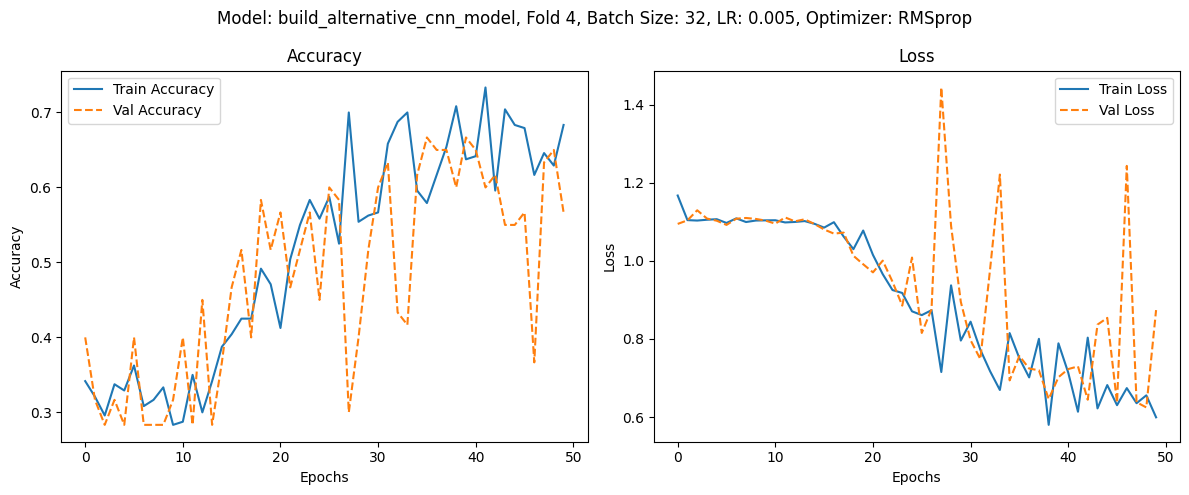

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

*** Current cross-validation iteration: 5/5 ***
Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.
Epoch 1/50


/Users/gasperkosenina/School/razvoj-inteligentnih-resitev-s-strojnim-ucenjem/konvolucijske-nevronske-mreze/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3060 - loss: 1.2139 - val_accuracy: 0.3000 - val_loss: 1.1016
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3243 - loss: 1.0992 - val_accuracy: 0.3333 - val_loss: 1.0988
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3648 - loss: 1.0965 - val_accuracy: 0.3333 - val_loss: 1.0971
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3356 - loss: 1.1114 - val_accuracy: 0.3000 - val_loss: 1.1003
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3350 - loss: 1.1010 - val_accuracy: 0.3000 - val_loss: 1.0996
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3732 - loss: 1.1003 - val_accuracy: 0.3333 - val_loss: 1.0993
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3423 - loss: 1.1008 - val_accuracy: 0.3000 - val_loss: 1.1002
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4039 - loss: 1.0912 - val_accuracy: 0.3667 - val_loss: 1.0967
Epoch 9/50


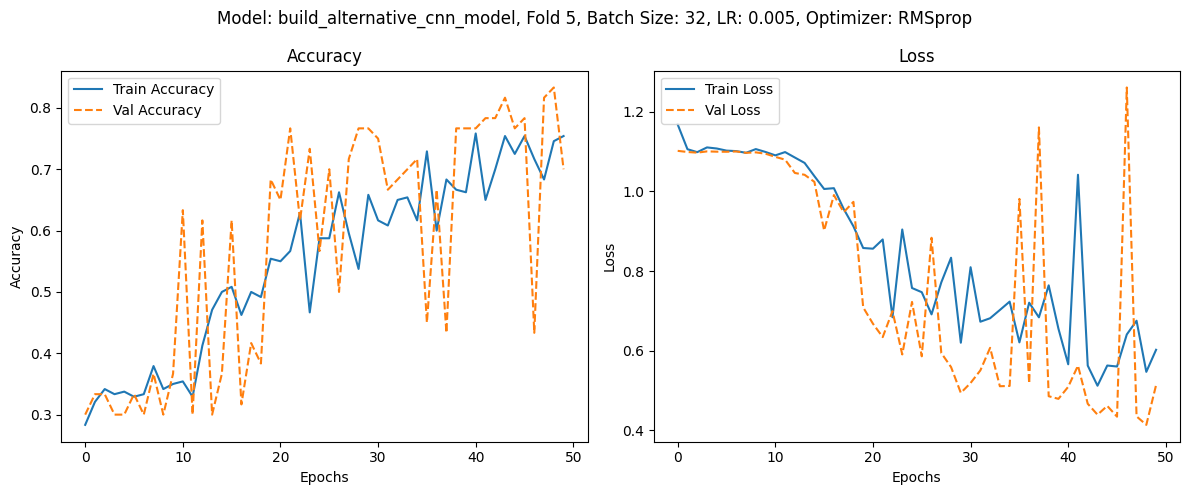

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import KFold
import pandas as pd

def train_and_evaluate_model(build_model_fn, batch_size, learning_rate, optimizer_fn):
    history_list = []
    all_scores = []

    kf = KFold(n_splits=5, shuffle=True, random_state=1234)

    for fold, (train_index, val_index) in enumerate(kf.split(df)):
        print(f"\n*** Current cross-validation iteration: {fold+1}/5 ***")
        
        train_df = df.iloc[train_index]
        val_df = df.iloc[val_index]

        train_iterator = train_datagen.flow_from_dataframe(
            dataframe=train_df,
            x_col='filepath',
            y_col='label',
            target_size=(28, 28),
            color_mode='grayscale',
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True,
            seed=1234
        )
        
        val_iterator = train_datagen.flow_from_dataframe(
            dataframe=val_df,
            x_col='filepath',
            y_col='label',
            target_size=(28, 28),
            color_mode='grayscale',
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=False,
            seed=1234
        )

        model = build_model_fn()
        model.compile(optimizer=optimizer_fn(learning_rate=learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        
        history = model.fit(
            train_iterator,
            validation_data=val_iterator,
            epochs=50
        )

        plot_per_fold(history.history, fold + 1, build_model_fn.__name__, batch_size, learning_rate, optimizer_fn.__name__)
        
        history_list.append(history.history) 

        val_labels = val_iterator.classes

        predictions = model.predict(val_iterator, batch_size=batch_size)
        predictions = np.argmax(predictions, axis=1)

        accuracy = accuracy_score(val_labels, predictions)
        f1 = f1_score(val_labels, predictions, average='weighted')
        precision = precision_score(val_labels, predictions, average='weighted')
        recall = recall_score(val_labels, predictions, average='weighted')

        all_scores.append({
            'accuracy': accuracy,
            'f1_score': f1,
            'precision': precision,
            'recall': recall
        })

    return all_scores


scores_cnn_model = train_and_evaluate_model(build_cnn_model, batch_size=1, learning_rate=0.001, optimizer_fn=Adam)

scores_alternative_cnn_model = train_and_evaluate_model(build_alternative_cnn_model, batch_size=1, learning_rate=0.001, optimizer_fn=Adam)

scores_cnn_model_32 = train_and_evaluate_model(build_cnn_model, batch_size=32, learning_rate=0.005, optimizer_fn=RMSprop)

scores_alternative_cnn_model_32 = train_and_evaluate_model(build_alternative_cnn_model, batch_size=32, learning_rate=0.005, optimizer_fn=RMSprop)


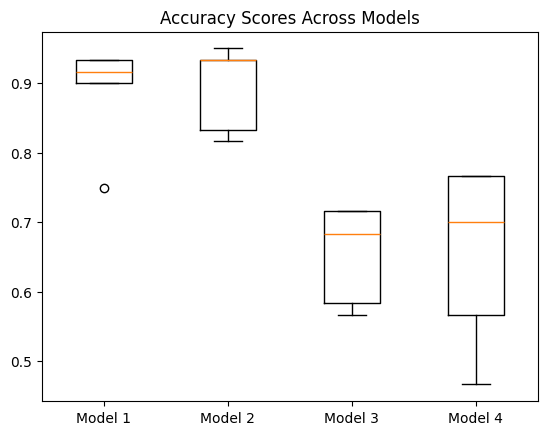

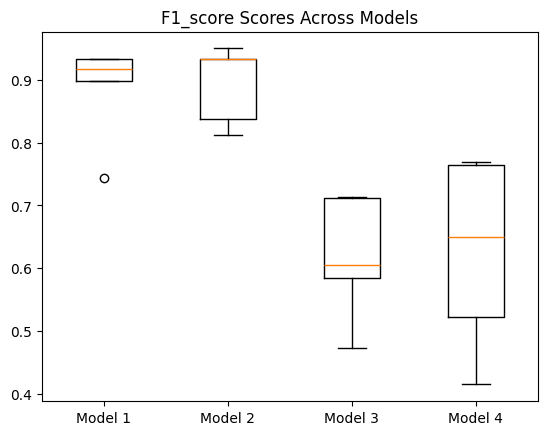

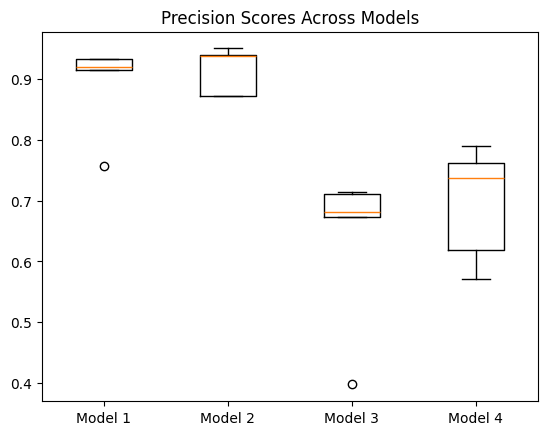

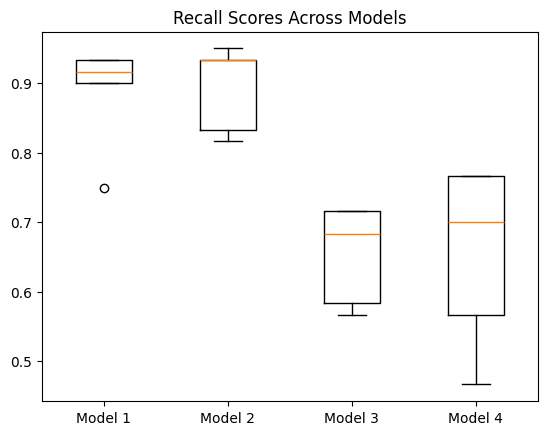

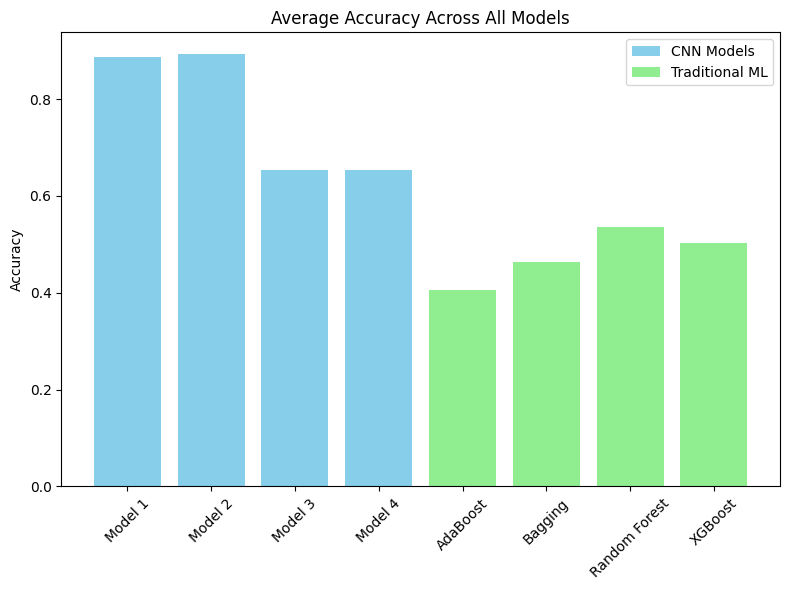

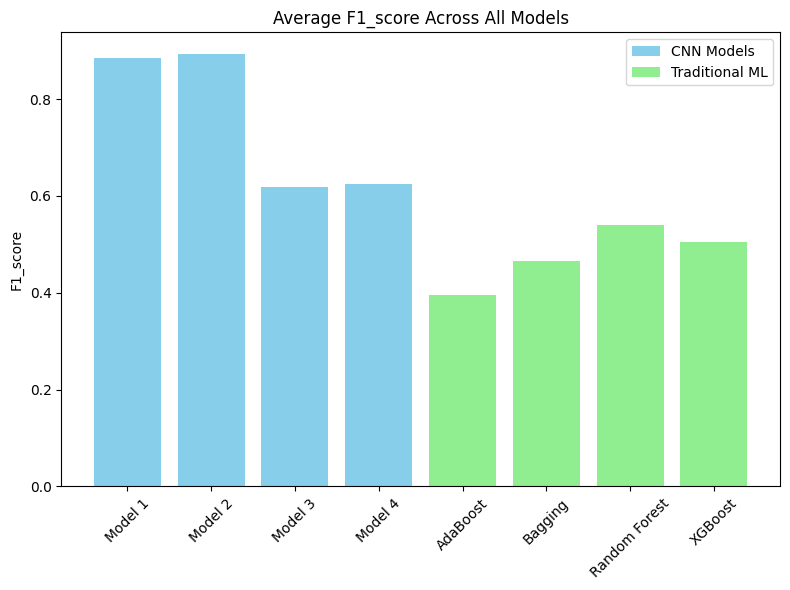

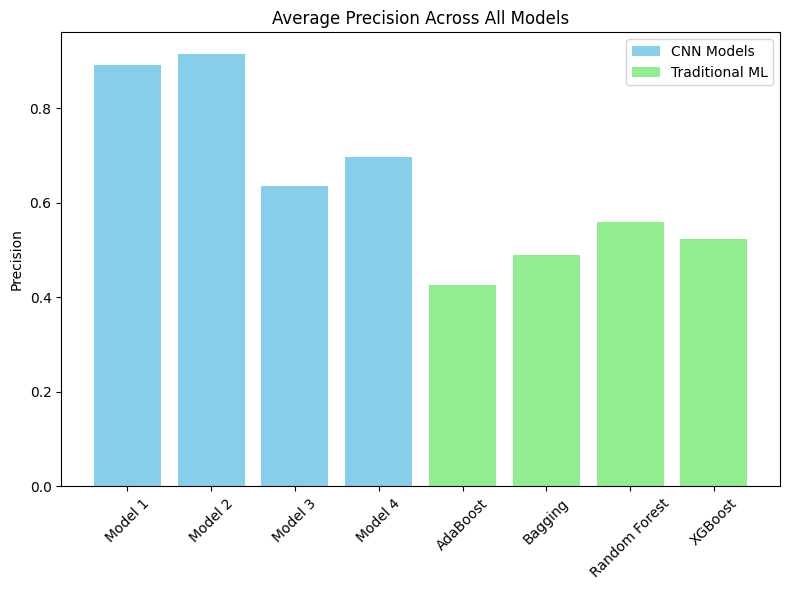

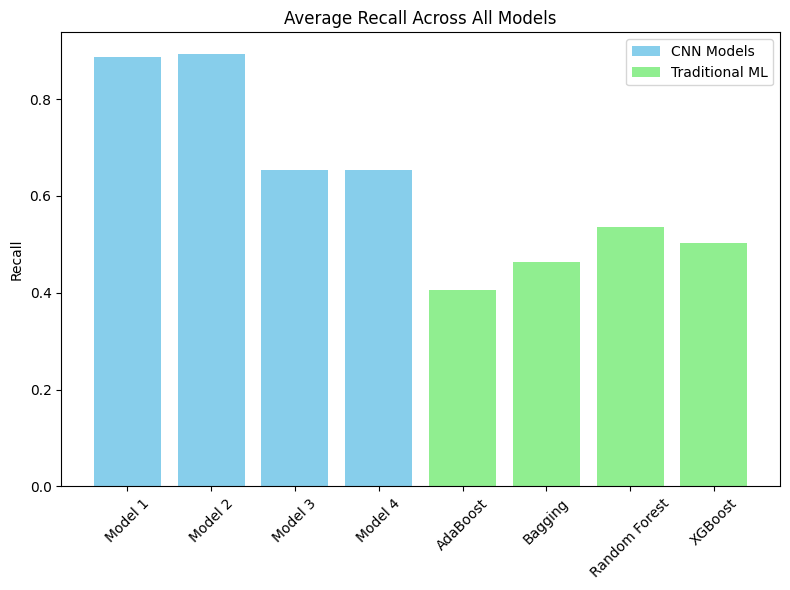

In [76]:
def calculate_metric_averages(scores_list, metric):
    return [sum(score[metric] for score in scores) / len(scores) for scores in scores_list]

def extract_metrics(scores_list, metric):
    return [[score[metric] for score in scores] for scores in scores_list]

all_model_scores = [
    scores_cnn_model,
    scores_alternative_cnn_model, 
    scores_cnn_model_32,
    scores_alternative_cnn_model_32
]

metrics = ['accuracy', 'f1_score', 'precision', 'recall']
metric_scores = {metric: extract_metrics(all_model_scores, metric) for metric in metrics}
metric_averages = {metric: calculate_metric_averages(all_model_scores, metric) for metric in metrics}


model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

for metric in metrics:
    plt.figure()
    plt.boxplot(metric_scores[metric], tick_labels=model_names)
    plt.title(f'{metric.capitalize()} Scores Across Models')
    plt.show()

traditional_scores = {
    'accuracy': [0.406667, 0.463333, 0.536667, 0.503333],
    'f1_score': [0.394891, 0.466287, 0.540173, 0.505008], 
    'precision': [0.425169, 0.488445, 0.558654, 0.523014],
    'recall': [0.406667, 0.463333, 0.536667, 0.503333]
}

traditional_model_names = ['AdaBoost', 'Bagging', 'Random Forest', 'XGBoost']
all_model_names = model_names + traditional_model_names

for metric in metrics:
    plt.figure(figsize=(8, 6))
    
    plt.bar(range(len(metric_averages[metric])), metric_averages[metric], color='skyblue', label='CNN Models')
    
    plt.bar(range(len(metric_averages[metric]), len(metric_averages[metric]) + len(traditional_scores[metric])), 
            traditional_scores[metric], color='lightgreen', label='Traditional ML')
    
    plt.title(f'Average {metric.capitalize()} Across All Models')
    plt.ylabel(metric.capitalize())
    plt.xticks(range(len(all_model_names)), all_model_names, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()